# Customer analysis case study 

In this notebook I will be cleaning and analyzing data coming from an auto insurance company. 
<br />
<br />
The notebook is divided into two parts. In the first part I will be merging three csv files containing client data after that I will be cleaning the data and preparing it for the analysis. 
<br />
In the second part I will be exploring and analyzing a cleaned data set containing client data. 
<br />
<br />
Here is the table of contents which will take you to the corresponding part of the notebook:
<br />

### Table of contents

* [1. Data cleaning](#chapter1)
* [2. Data analysis](#chapter2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Part 1 - Data Cleaning <a class="anchor" id="chapter1"></a>

In [2]:
#importing the data that I will be working on: 

customer_df1 = pd.read_csv('Data/file1.csv')
customer_df2 = pd.read_csv('Data/file2.csv')
customer_df3 = pd.read_csv('Data/file3.csv')

all_dfs_list = [customer_df1,customer_df2,customer_df3]

In [3]:
customer_df1

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
customer_df2

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.600000,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.200000,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.600000,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.200000,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.200000,Corporate Auto,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75%,63513,70,1/0/00,185.667213,Personal Auto,Four-Door Car
992,BS91566,Arizona,F,College,543121.91%,58161,68,1/0/00,140.747286,Corporate Auto,Four-Door Car
993,IL40123,Nevada,F,College,568964.41%,83640,70,1/0/00,471.050488,Corporate Auto,Two-Door Car
994,MY32149,California,F,Master,368672.38%,0,96,1/0/00,28.460568,Personal Auto,Two-Door Car


In [5]:
customer_df3

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [6]:
#this is a function that will change all column names to lower case: 

def columns_headers_to_lowercase(df):
    '''enter dataframe as variable'''
    df.columns = df.columns.str.lower()
    return df

In [7]:
columns_headers_to_lowercase(customer_df1)
columns_headers_to_lowercase(customer_df2)
columns_headers_to_lowercase(customer_df3)

,customer,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [8]:
#this function will change a column name to a new one:

def change_column_name(df, old_column_name, new_column_name):
    df.rename(columns={old_column_name:new_column_name},inplace=True)
    return df

In [9]:
change_column_name(customer_df1,'st','state')
change_column_name(customer_df2,'st','state')

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount,policy type,vehicle class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.600000,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.200000,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.600000,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.200000,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.200000,Corporate Auto,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75%,63513,70,1/0/00,185.667213,Personal Auto,Four-Door Car
992,BS91566,Arizona,F,College,543121.91%,58161,68,1/0/00,140.747286,Corporate Auto,Four-Door Car
993,IL40123,Nevada,F,College,568964.41%,83640,70,1/0/00,471.050488,Corporate Auto,Two-Door Car
994,MY32149,California,F,Master,368672.38%,0,96,1/0/00,28.460568,Personal Auto,Two-Door Car


In [10]:
# check if column names are the same in all three data frames

customer_df1.columns == customer_df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False])

In [11]:
customer_df1.columns == customer_df3.columns

array([ True,  True, False,  True, False,  True,  True,  True,  True,
       False, False])

In [12]:
# merge all dataframes together

# in case to merge all dataframes it's not necessary to rearrange columns first 
# if all column headers are the same for all dataframes.

customer_df = pd.concat([customer_df1,customer_df2,customer_df3], axis=0)
customer_df

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [13]:
# this function will drop a column from a dataframe: 

def drop_column(df,column_name):
    df.drop(columns=[column_name], inplace=True)
    return df

In [14]:
#getting data types to check if any of them should be converted to a numerical data type 

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   9137 non-null   object 
 1   state                      9137 non-null   object 
 2   gender                     9015 non-null   object 
 3   education                  9137 non-null   object 
 4   customer lifetime value    9130 non-null   object 
 5   income                     9137 non-null   float64
 6   monthly premium auto       9137 non-null   float64
 7   number of open complaints  9137 non-null   object 
 8   policy type                9137 non-null   object 
 9   vehicle class              9137 non-null   object 
 10  total claim amount         9137 non-null   float64
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [15]:
#deleting the percent sign from the column customer lifetime value to be able to convert data type to numeric

customer_df['customer lifetime value']=customer_df['customer lifetime value'].replace({'%': ''}, regex=True)

In [16]:
#converting column customer lifetime value to numeric

customer_df['customer lifetime value'] = pd.to_numeric(customer_df['customer lifetime value'], errors='coerce')

In [17]:
#rounding the converted values in customer lifetime value column to two decimal numbers

customer_df['customer lifetime value'] = customer_df['customer lifetime value'].round()

In [18]:
customer_df['number of open complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan, 0,
       2, 3, 1, 5, 4], dtype=object)

In [19]:
#changing the wrongly formatted data in column number of open complaints

customer_df['number of open complaints'] = customer_df['number of open complaints'].replace({'1/0/00':0,'1/2/00':2,'1/1/00':1,'1/3/00':3,'1/5/00':5,'1/4/00':4}, regex=True)

In [20]:
customer_df['number of open complaints'].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4., nan])

In [21]:
customer_df['gender'].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [22]:
#unifying the format of data in column gender

customer_df['gender'] = customer_df['gender'].replace({'Femal':'F','female':'F','Male':'M'}, regex=True)

In [23]:
customer_df['gender'].value_counts(dropna=False)

F      4607
M      4408
NaN    3059
Name: gender, dtype: int64

In [24]:
customer_df['state'].value_counts(dropna=False)

California    3032
NaN           2937
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: state, dtype: int64

In [25]:
#unifying the format of data in column state
customer_df['state'] = customer_df['state'].replace({'Cali':'California','AZ':'Arizona','WA':'Washington'})

In [26]:
customer_df['state'].value_counts(dropna=False)

California    3152
NaN           2937
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: state, dtype: int64

In [27]:
customer_df['education'].value_counts()

Bachelor                2719
College                 2682
High School or Below    2616
Master                   752
Doctor                   344
Bachelors                 24
Name: education, dtype: int64

In [28]:
#unifying the format of data in column education

customer_df['education'] = customer_df['education'].replace({'Bachelors' : 'Bachelor'})

In [29]:
#rounding data in column total claim amount to two decimal points

customer_df['total claim amount'] = customer_df['total claim amount'].round(2)

In [30]:
#dropping duplicates in the dataframe

customer_df = customer_df.drop_duplicates()

In [31]:
#dropping column customer after dropping duplicates

drop_column(customer_df,'customer')

/Users/filipmakara2/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.70
1,Arizona,F,Bachelor,697954.0,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.46
2,Nevada,F,Bachelor,1288743.0,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.47
3,California,M,Bachelor,764586.0,0.0,106.0,0.0,Corporate Auto,SUV,529.88
4,Washington,M,High School or Below,536308.0,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.27
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23406.0,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.23
7066,California,F,College,3097.0,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.20
7067,California,M,Bachelor,8164.0,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.78
7068,California,M,College,7524.0,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.20


In [32]:
def fill_na_with_mean (df_column):
    '''as argument pass the column in which nans should be replaced with mean value of the column'''
    df_column.fillna(np.mean(df_column), inplace=True)
    return df_column

In [33]:
#filling NaNs in column customer lifetime value with the mean of other values from column

customer_df['customer lifetime value'] = fill_na_with_mean(customer_df['customer lifetime value'])

/Users/filipmakara2/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_26652/3229169698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['customer lifetime value'] = fill_na_with_mean(customer_df['customer lifetime value'])


In [34]:
#rounding data in customer lifetime value column to zero decimal points and changing type to integer

customer_df['customer lifetime value'] = customer_df['customer lifetime value'].round(0).astype(int)

/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_26652/1196622241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['customer lifetime value'] = customer_df['customer lifetime value'].round(0).astype(int)


In [35]:
#filling Nans in column income

customer_df['income'] = fill_na_with_mean(customer_df['income'])

/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_26652/2432223178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['income'] = fill_na_with_mean(customer_df['income'])


In [36]:
#rounding data in income column to 0 decimal points and changing type to int 
customer_df['income'] = customer_df['income'].round(0).astype(int)

/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_26652/1789231012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['income'] = customer_df['income'].round(0).astype(int)


In [37]:
#filling Nans in column monthly premium auto
customer_df['monthly premium auto']=fill_na_with_mean(customer_df['monthly premium auto'])

/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_26652/3860629452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['monthly premium auto']=fill_na_with_mean(customer_df['monthly premium auto'])


In [38]:
#rounding data in monthly premium auto column to 0 decimal points and changing type to int 
customer_df['monthly premium auto'] = customer_df['monthly premium auto'].round(0).astype(int)

/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_26652/1997645732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['monthly premium auto'] = customer_df['monthly premium auto'].round(0).astype(int)


In [39]:
#changing all strings in the dataframe to lower case:

customer_df = customer_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [40]:
customer_df

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,washington,NaN,master,182072,0,1000,0.0,personal auto,four-door car,2.70
1,arizona,f,bachelor,697954,0,94,0.0,personal auto,four-door car,1131.46
2,nevada,f,bachelor,1288743,48767,108,0.0,personal auto,two-door car,566.47
3,california,m,bachelor,764586,0,106,0.0,corporate auto,suv,529.88
4,washington,m,high school or below,536308,36357,68,0.0,personal auto,four-door car,17.27
...,...,...,...,...,...,...,...,...,...,...
7065,california,m,bachelor,23406,71941,73,0.0,personal auto,four-door car,198.23
7066,california,f,college,3097,21604,79,0.0,corporate auto,four-door car,379.20
7067,california,m,bachelor,8164,0,85,3.0,corporate auto,four-door car,790.78
7068,california,m,college,7524,21941,96,0.0,personal auto,four-door car,691.20


In [41]:
#creating new column in which every state will be categorized to a corresponding region: 

region_dict = {'california':'west region','oregon':'north west','washington':'east','arizona':'central','nevada':'central'}

customer_df['region'] = customer_df['state'].map(region_dict)

In [42]:
customer_df

,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,region
0,washington,NaN,master,182072,0,1000,0.0,personal auto,four-door car,2.70,east
1,arizona,f,bachelor,697954,0,94,0.0,personal auto,four-door car,1131.46,central
2,nevada,f,bachelor,1288743,48767,108,0.0,personal auto,two-door car,566.47,central
3,california,m,bachelor,764586,0,106,0.0,corporate auto,suv,529.88,west region
4,washington,m,high school or below,536308,36357,68,0.0,personal auto,four-door car,17.27,east
...,...,...,...,...,...,...,...,...,...,...,...
7065,california,m,bachelor,23406,71941,73,0.0,personal auto,four-door car,198.23,west region
7066,california,f,college,3097,21604,79,0.0,corporate auto,four-door car,379.20,west region
7067,california,m,bachelor,8164,0,85,3.0,corporate auto,four-door car,790.78,west region
7068,california,m,college,7524,21941,96,0.0,personal auto,four-door car,691.20,west region


In [43]:
#Saving the cleaned data to a new csv file: 

customer_df.to_csv('Cleaned_Customer_Dataset.csv')

## Part 2 - Data analysis <a class="anchor" id="chapter2"></a>

In [44]:
cleaned_df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')

In [45]:
cleaned_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [ ]:
#fill nans in income with median or mean after removing the outliers possibly

In [46]:
#checking which columns are numerical and which are categorical

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [47]:
#changing column effective to date to date format
cleaned_df['Effective To Date'] = pd.to_datetime(cleaned_df['Effective To Date'])

In [48]:
cleaned_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [49]:
#creating a dataframe which will contain all numerical data from the cleaned dataframe
numerical_df = cleaned_df.select_dtypes(include=np.number)
numerical_df

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [50]:
#creating a dataframe which will contain all categorical data from the cleaned dataframe
categorical_df = cleaned_df.select_dtypes(include=np.object)
categorical_df

/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_26652/4100344152.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = cleaned_df.select_dtypes(include=np.object)


,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [51]:
#fuction creating distribution plots for all columns in the numerical dataframe

def create_distribution_plots(numerical_df):
    plt.figure(figsize = (14,12))
    for i, col in enumerate(numerical_df.iloc[:,1:], 1):
        plt.subplot(4,2,i)
        sns.distplot(numerical_df[col])

/Users/filipmakara2/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/filipmakara2/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/filipmakara2/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

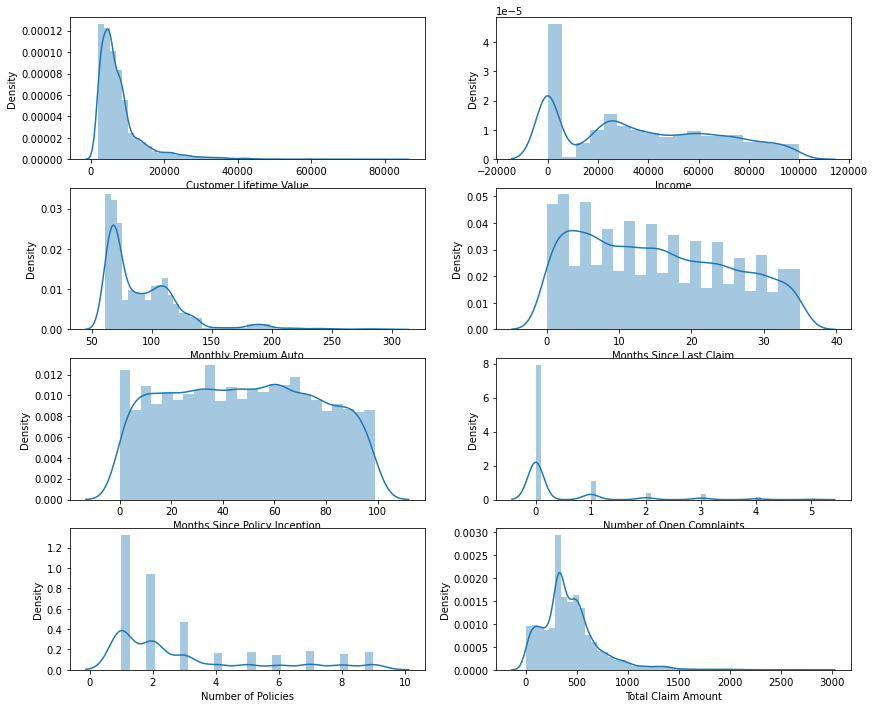

In [52]:
create_distribution_plots(numerical_df)

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Count'>

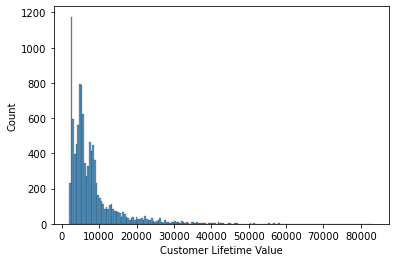

In [53]:
#creating histogram with seaborn

sns.histplot(data=cleaned_df, x='Customer Lifetime Value')

(array([8.665e+03, 1.431e+03, 4.940e+02, 1.770e+02, 9.500e+01, 2.500e+01,
        1.400e+01, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([ 1898.007675 , 10040.7450265, 18183.482378 , 26326.2197295,
        34468.957081 , 42611.6944325, 50754.431784 , 58897.1691355,
        67039.906487 , 75182.6438385, 83325.38119  ]),
 <BarContainer object of 10 artists>)

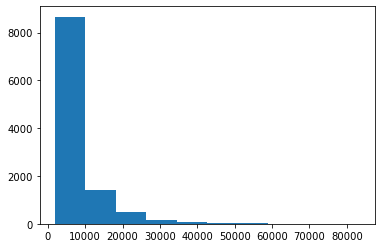

In [54]:
#creating histogram with matplotlib

plt.hist(cleaned_df['Customer Lifetime Value'])

array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly Premium Auto'}>],
       [<AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Months Since Policy Inception'}>,
        <AxesSubplot:title={'center':'Number of Open Complaints'}>],
       [<AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:title={'center':'Total Claim Amount'}>,
        <AxesSubplot:>]], dtype=object)

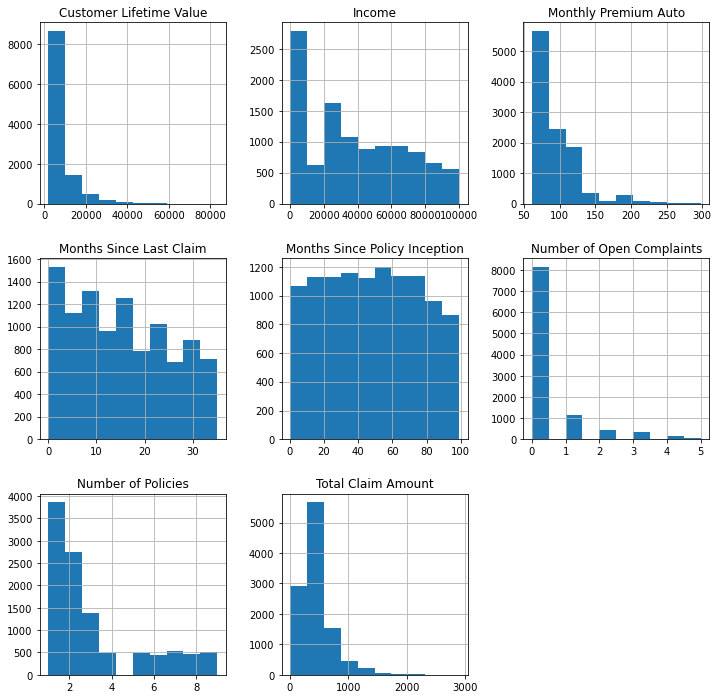

In [55]:
#creating histograms with pandas, for all columns in the numerical dataframe
numerical_df.iloc[:,1:].hist(figsize=(12,12))

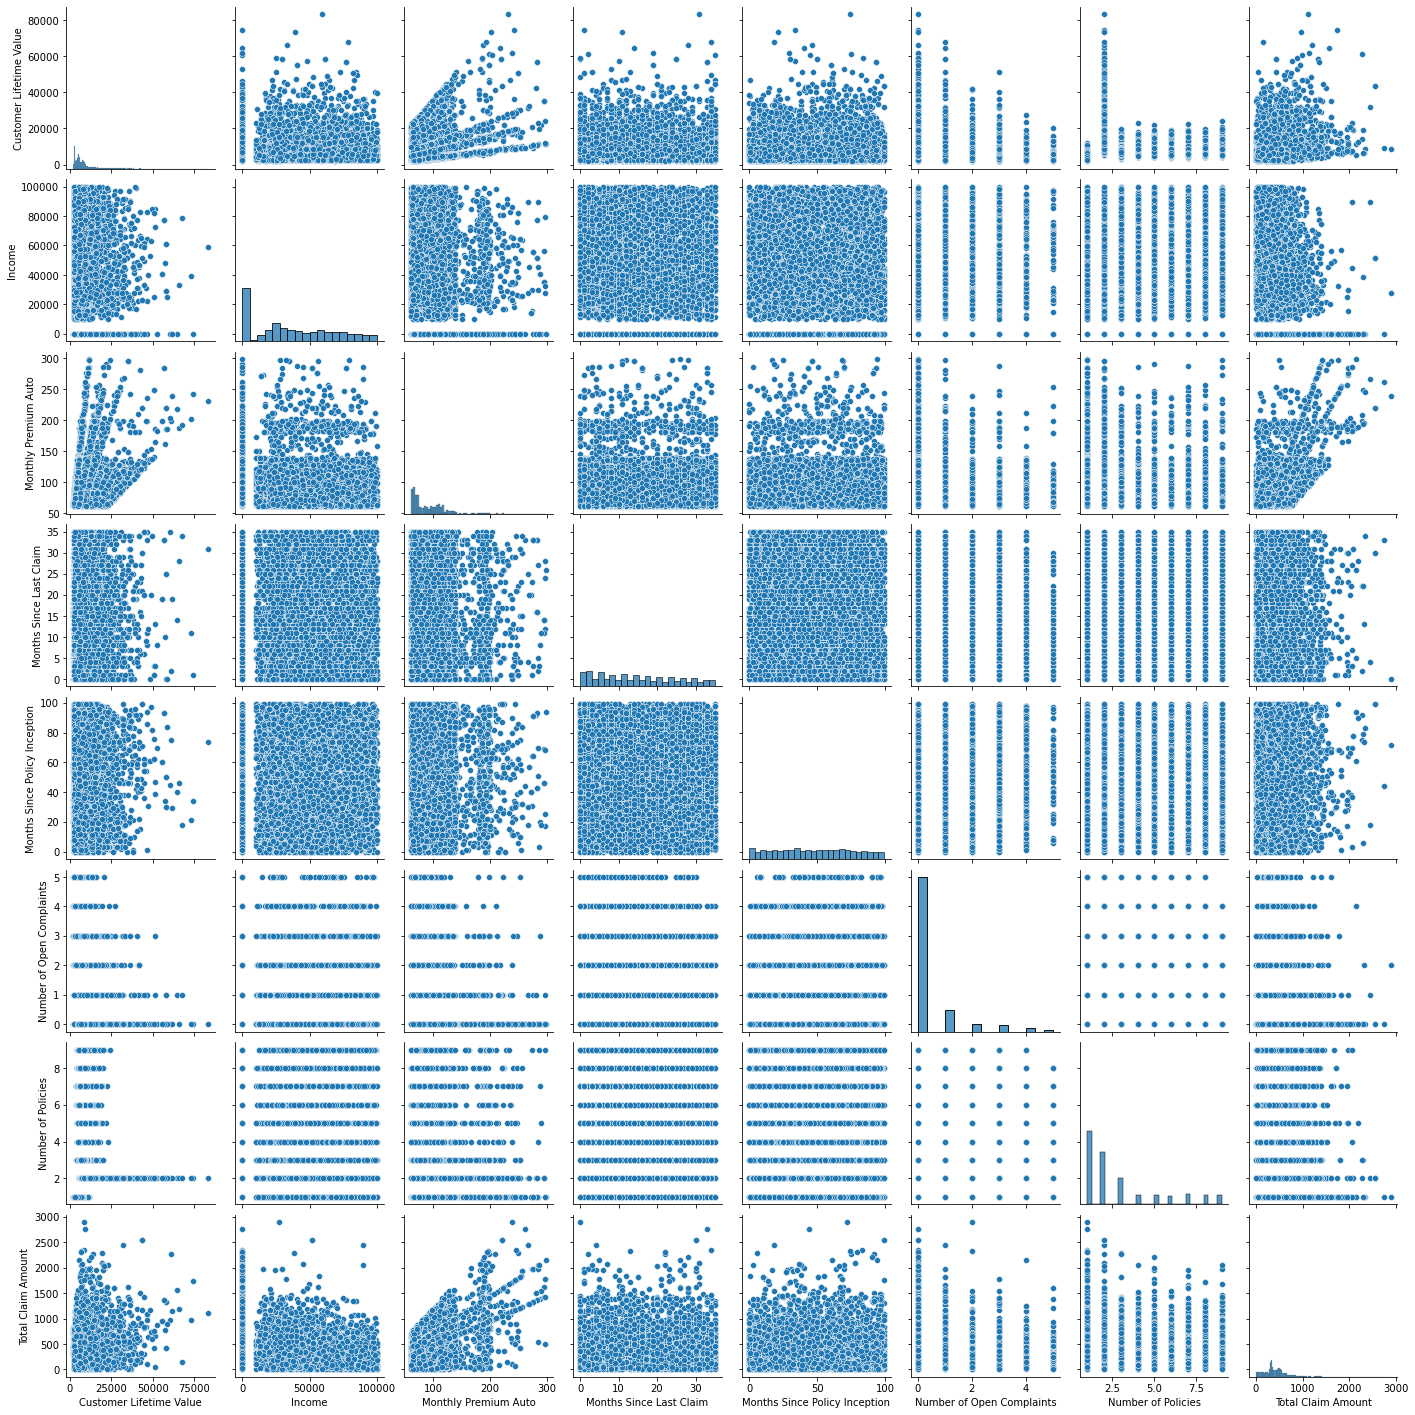

In [56]:
#creating scatterplots for all data in the numerical dataframe

sns.pairplot(numerical_df.iloc[:,1:])

### Activity 5

- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.
- Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

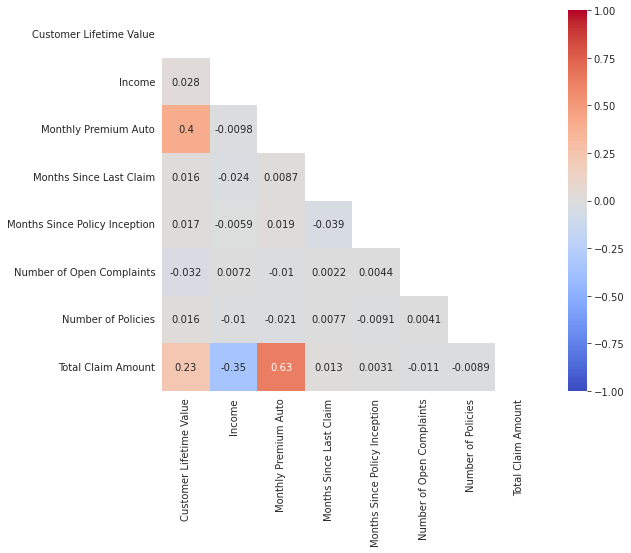

In [57]:
#creating heatmap for all numerical values

corr = numerical_df.iloc[:,1:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [58]:
#There is no pair of features that have a high correlation.

In [59]:
#preparing data in Response column to plot a barplot wth it:

all_responses = cleaned_df['Response'].value_counts()
all_responses

No     8813
Yes    1466
Name: Response, dtype: int64

<AxesSubplot:title={'center':'Repsonse rate grouped by the income'}, xlabel='Response', ylabel='Income'>

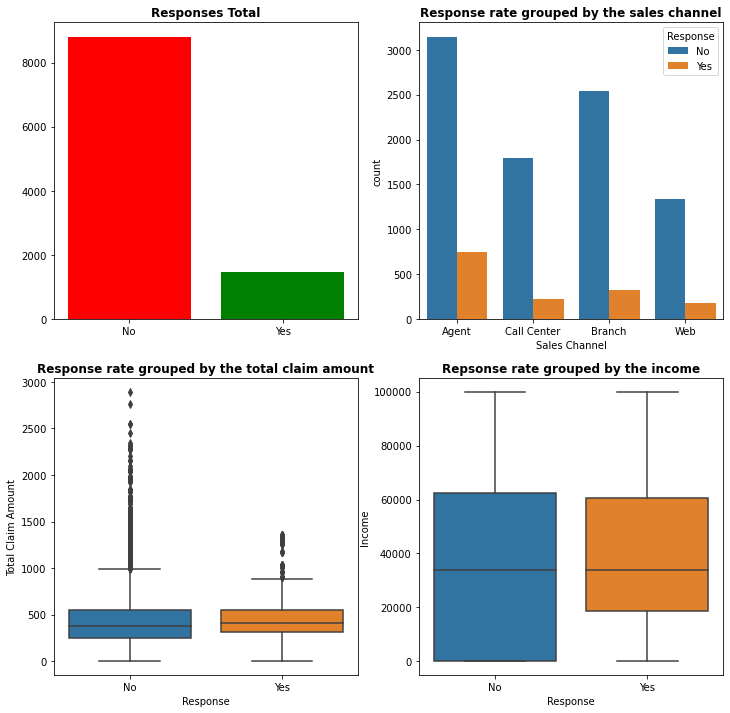

In [60]:
#creating canvas for 4 plots:

fig1, ax1 = plt.subplots(2,2,figsize = (12,12))

#creating plot 1 with matplotlib:

ax1[0,0].bar(all_responses.index, all_responses, color=('red','green'))
ax1[0,0].set_title('Responses Total', fontweight='bold')

#creating plots 1, 2, 3 with seaborn: 

ax1[0,1].set_title('Response rate grouped by the sales channel', fontweight='bold')
sns.countplot(x = cleaned_df["Sales Channel"],y = None, hue = cleaned_df['Response'],ax = ax1[0,1], palette=None)

ax1[1,0].set_title('Response rate grouped by the total claim amount', fontweight='bold')
sns.boxplot(x=cleaned_df["Response"],y=cleaned_df["Total Claim Amount"], ax = ax1[1,0])

ax1[1,1].set_title('Repsonse rate grouped by the income', fontweight='bold')
sns.boxplot(x=cleaned_df["Response"], y=cleaned_df['Income'], ax = ax1[1,1])

In [61]:
#creating bins for column Total Claim Amount to plot a countplot of responses grouped by Total Claim Amount:

total_claim_amount_bins = pd.cut(cleaned_df["Total Claim Amount"], bins=5,labels=['very low','low','medium','high','very high'])

<AxesSubplot:title={'center':'Response rate by the total claim amount'}, xlabel='Total Claim Amount', ylabel='count'>

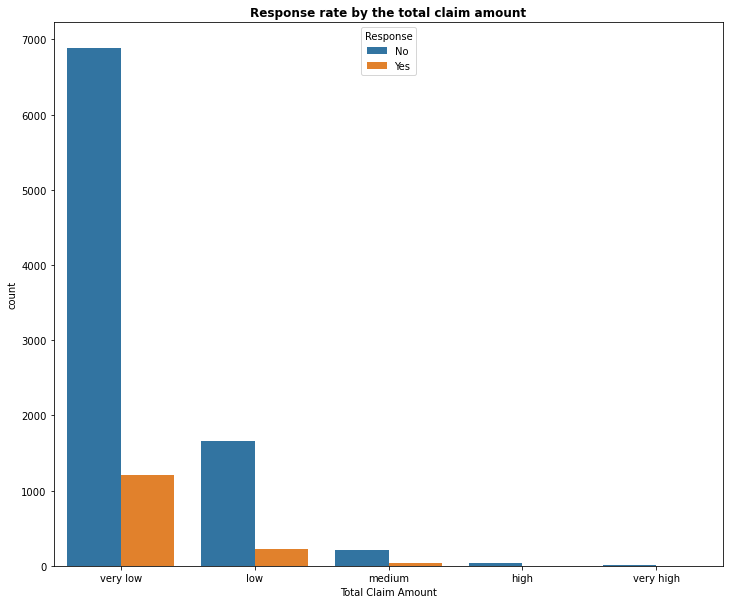

In [62]:
#creating countplot with binned data:

fig3, ax3 = plt.subplots(figsize = (12,10))
ax3.set_title('Response rate by the total claim amount', fontweight='bold')
sns.countplot(x = total_claim_amount_bins, y = None, hue = cleaned_df["Response"], ax = ax3, palette=None)

In [ ]:
sns.countplot(x)

Text(0.5, 1.0, 'Total claim amount sorted by vehicle class')

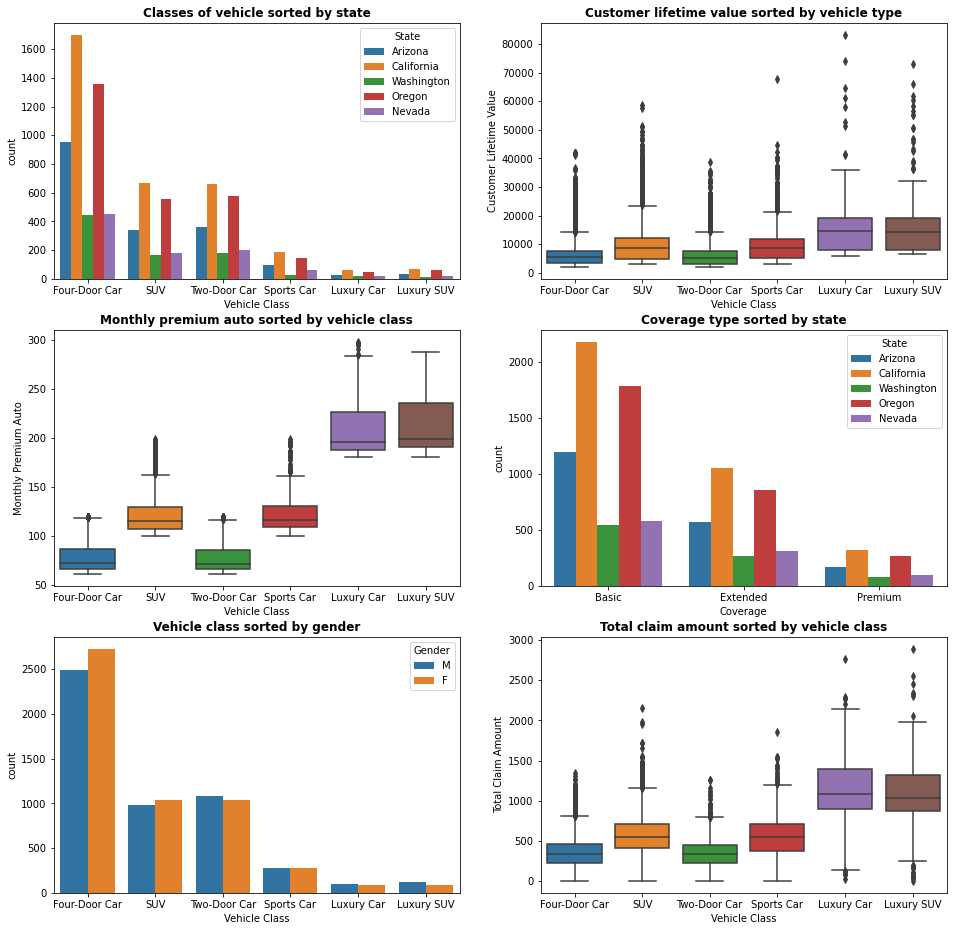

In [63]:
#canvas for 6 plots:
fig4, ax4 = plt.subplots(3,2, figsize=(16,16))

sns.countplot(x=cleaned_df['Vehicle Class'],y=None,hue=cleaned_df['State'], ax=ax4[0,0])
ax4[0,0].set_title('Classes of vehicle sorted by state', fontweight='bold')

sns.boxplot(x=cleaned_df['Vehicle Class'], y=cleaned_df['Customer Lifetime Value'], ax=ax4[0,1])
ax4[0,1].set_title('Customer lifetime value sorted by vehicle type', fontweight='bold')

sns.boxplot(x=cleaned_df['Vehicle Class'],y=cleaned_df['Monthly Premium Auto'], ax=ax4[1,0])
ax4[1,0].set_title('Monthly premium auto sorted by vehicle class', fontweight='bold')

sns.countplot(x=cleaned_df['Coverage'],y=None,hue=cleaned_df['State'], ax=ax4[1,1])
ax4[1,1].set_title('Coverage type sorted by state', fontweight='bold')

sns.countplot(x=cleaned_df['Vehicle Class'],y=None,hue=cleaned_df['Gender'], ax=ax4[2,0])
ax4[2,0].set_title('Vehicle class sorted by gender', fontweight='bold')

sns.boxplot(x=cleaned_df['Vehicle Class'], y=cleaned_df['Total Claim Amount'], ax = ax4[2,1])
ax4[2,1].set_title('Total claim amount sorted by vehicle class', fontweight='bold')